# Potato Leaf Desease with CNN

### Download the Dataset

In [ ]:
!wget --no-check-certificate -q -O potato-leaf-diseases.zip "https://github.com/farismnrr/classification-of-potato-leaf-diseases/releases/download/dataset/PlantVillage.zip"
!unzip -q potato-leaf-diseases.zip

### Import Necessary Modules and Set Up Directories

In [ ]:
# Import Libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Configure Folders
train_folder = '/content/PlantVillage/train'
test_folder = '/content/PlantVillage/test'

class_folders = [
    ('Early Blight', '/content/PlantVillage/train/Potato___Early_blight'),
    ('Late Blight', '/content/PlantVillage/train/Potato___Late_blight'),
    ('Healthy', '/content/PlantVillage/train/Potato___healthy')
]

# Image Information
for class_name, folder in class_folders:
    print(f"Total images in '{class_name}' class: {len(os.listdir(folder))}")

# Model Configuration
labels = ['Late Blight', 'Early Blight', 'Healthy']
img_size = (150, 150)

Total images in 'Early Blight' class: 800
Total images in 'Late Blight' class: 800
Total images in 'Healthy' class: 122


### Load Dataset

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255,

    # Apply Data Augmentation Techniques
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

    # Split the Data into Training and Validation (80% - 20%)
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1378 images belonging to 3 classes.
Found 344 images belonging to 3 classes.


### Build CNN Model

In [ ]:
# Create a new CNN model
model = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size 3x3, ReLU activation
# Input shape is set to 150x150x3 (RGB images)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Layer 2: Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size 3x3, ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Layer 4: Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Layer 5: Convolutional layer with 128 filters, kernel size 3x3, ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))

# Layer 6: Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Layer 7: Convolutional layer with 256 filters, kernel size 3x3, ReLU activation
model.add(Conv2D(256, (3, 3), activation='relu'))

# Layer 8: Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Layer 9: Flatten layer to reshape feature maps into vectors
model.add(Flatten())

# Layer 10: Fully connected layer with 512 neurons, ReLU activation
model.add(Dense(512, activation='relu'))

# Layer 11: Output layer with 3 neurons, softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,995 (25.99 MB)

 Trainable params: 6,812,995 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

None


### Train the CNN Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.001)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.4512 - loss: 1.0539 - val_accuracy: 0.7558 - val_loss: 0.8571 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6871 - loss: 0.7873 - val_accuracy: 0.8110 - val_loss: 0.5588 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8233 - loss: 0.4995 - val_accuracy: 0.8721 - val_loss: 0.4058 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8634 - loss: 0.3736 - val_accuracy: 0.8561 - val_loss: 0.4060 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8552 - loss: 0.4162 - val_accuracy: 0.8794 - val_loss: 0.3221 - learning_rate: 0.0010
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9068 - loss: 0.2616 - val_accuracy: 0.9172 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9190 - loss: 0.2431 - val_accuracy: 0.9099 - 

Save the Model

In [ ]:
model.save('model.h5')

### Plot the Model's Accuracy and Loss Curves

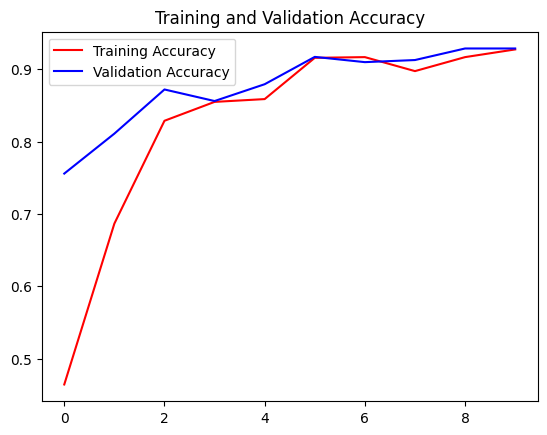

In [ ]:
# Get the Model's Training and Validation Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the Number of Epochs
epochs = range(len(acc))

# Plot the Training and Validation Accuracy Curves
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')

# Set the Plot Title and Legend
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)

# Display the Plot
plt.show()

# Test Model and Photo

### Test using Model and Test Photo

In [ ]:
# Import Library
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Test Code
def test_model(test_folder):
    model = load_model('model.h5')
    labels = ['Late Blight', 'Early Blight', 'Healthy']
    for subfolder in os.listdir(test_folder):
        subfolder_path = os.path.join(test_folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = image.load_img(img_path, target_size=(150, 150))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, 0)  # Create a batch
                img_array = img_array / 255  # Normalize pixel values
                predictions = model.predict(img_array)
                label_index = np.argmax(predictions[0])
                label = labels[label_index]
                print(f"{label} - {subfolder}/{filename}")

# Run test code
test_model(test_folder='/content/PlantVillage/test')

Test using Photo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
The plant is Healthy


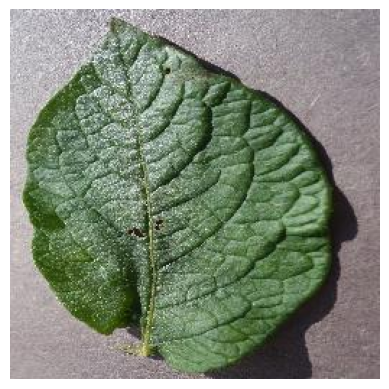

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def test_individual_image(image_path):
    model = tf.keras.models.load_model('model.h5')
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    img_array /= 255
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    classes = ['Late Blight', 'Early Blight', 'Healthy']
    print(f'The plant is {classes[predicted_class]}')

    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

test_individual_image('/content/PlantVillage/test/Potato___healthy/d50a580b-46bd-47f5-a0bf-8535da774104___RS_HL 5408.JPG')

# Delete All Directory Files

In [ ]:
# Delete all files and subfolders in the training dataset
# ===============================================

import os
import shutil

# Define the base path for the training dataset
base_path = '/content/'

# Iterate through the directory tree and delete all files and subfolders
for root, subdirectories, files in os.walk(base_path, topdown=False):
    # Delete each file in the current directory
    for file in files:
        file_path = os.path.join(root, file)
        os.unlink(file_path)

    # Delete each subdirectory in the current directory
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(root, subdirectory)
        shutil.rmtree(subdirectory_path)